In [1]:
from qiskit.visualization import array_to_latex
from util import obtain_random_nontrivial_laplacian

n_num_qubits = 10
num_nodes = 2 ** n_num_qubits

L_sparse, Lp_sparse = obtain_random_nontrivial_laplacian(
    n_num_qubits=n_num_qubits,
    d_skeleton_regularity=7
)
L_dense = L_sparse.to_matrix().real
Lp_dense = Lp_sparse.to_matrix().real

# array_to_latex(L_dense)

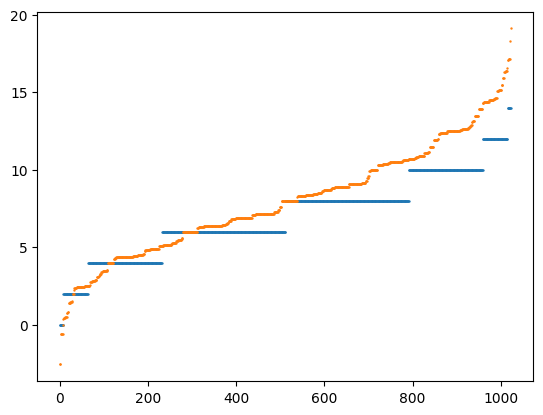

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(range(num_nodes), np.linalg.eigh(L_dense)[0], s=0.5)
plt.scatter(range(num_nodes), np.linalg.eigh(Lp_dense)[0], s=0.5)

In [3]:
from util import is_valid_laplacian

is_valid_laplacian(Lp_dense)

The matrix is a valid (weighted) Laplacian matrix


True

nx.is_connected(skeleton_graph)=False
nx.is_weighted(skeleton_graph)=True
nx.is_strongly_regular(skeleton_graph)=False
nx.is_negatively_weighted(skeleton_graph)=False
nx.is_planar(skeleton_graph)=False


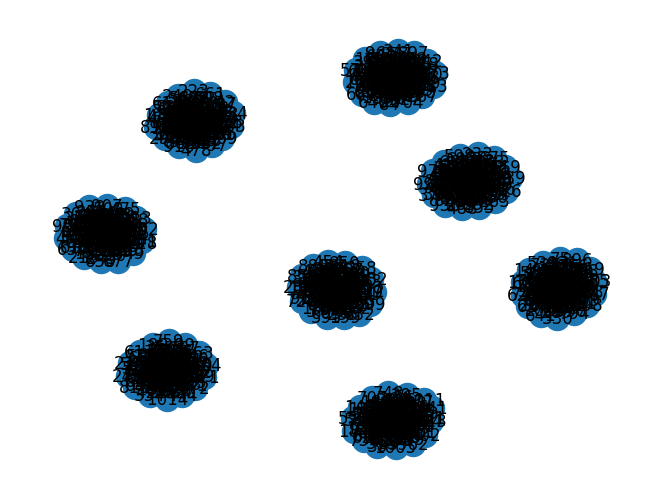

In [4]:
import networkx as nx
from util import decompose_laplacian_matrix

_, _, A_dense = decompose_laplacian_matrix(L_dense)
skeleton_graph = nx.from_numpy_array(A_dense)

nx.draw(skeleton_graph, with_labels=True)

print(f"{nx.is_connected(skeleton_graph)=}")
print(f"{nx.is_weighted(skeleton_graph)=}")
print(f"{nx.is_strongly_regular(skeleton_graph)=}")
print(f"{nx.is_negatively_weighted(skeleton_graph)=}")
print(f"{nx.is_planar(skeleton_graph)=}")

nx.is_connected(disturbed_graph)=True
nx.is_weighted(disturbed_graph)=True
nx.is_strongly_regular(disturbed_graph)=False
nx.is_negatively_weighted(disturbed_graph)=True
nx.is_planar(disturbed_graph)=False


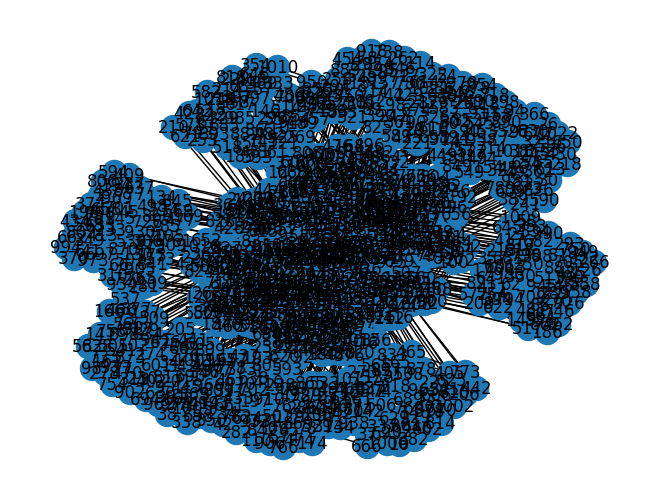

In [5]:
_, _, Ap_dense = decompose_laplacian_matrix(Lp_dense)
disturbed_graph = nx.from_numpy_array(Ap_dense)

nx.draw(disturbed_graph, with_labels=True)

print(f"{nx.is_connected(disturbed_graph)=}")
print(f"{nx.is_weighted(disturbed_graph)=}")
print(f"{nx.is_strongly_regular(disturbed_graph)=}")
print(f"{nx.is_negatively_weighted(disturbed_graph)=}")
print(f"{nx.is_planar(disturbed_graph)=}")

In [6]:
len(L_sparse.to_list())

8

In [7]:
len(Lp_sparse.to_list())

72

------------

In [8]:
from qiskit.quantum_info import SparsePauliOp

op_00 = SparsePauliOp(data=["II", "IZ", "ZI", "ZZ"], coeffs=[0.25 for _ in range(4)])
op_01 = SparsePauliOp(data=["XX", "XY", "YX", "YY"], coeffs=[0.25, 0.25j, 0.25j, -0.25])
op_10 = SparsePauliOp(data=["XX", "XY", "YX", "YY"], coeffs=[0.25, -0.25j, -0.25j, -0.25])
op_11 = SparsePauliOp(data=["II", "IZ", "ZI", "ZZ"], coeffs=[0.25, -0.25, -0.25, 0.25])

In [9]:
display(array_to_latex(op_00.to_matrix(), prefix=r"|00\rangle\langle00| = "))
display(array_to_latex(op_01.to_matrix(), prefix=r"|01\rangle\langle01| = "))
display(array_to_latex(op_10.to_matrix(), prefix=r"|10\rangle\langle10| = "))
display(array_to_latex(op_11.to_matrix(), prefix=r"|11\rangle\langle11| = "))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

------------

**Input**: An $IX_n$ Laplacian Hamiltonian.

**Output**: The same Laplacian Hamiltonian, but with at least one more edge.

Let's have a specific exmaple. Input Laplacian Hamiltonian:

$$
    L = 3III - IXI - XXI - XXX
    \tag{1}
$$

In [10]:
L_input_sparse = SparsePauliOp(
    data=["III", "IXI", "XXI", "XXX"],
    coeffs=[3, -1, -1, -1]
)

L_input_sparse

SparsePauliOp(['III', 'IXI', 'XXI', 'XXX'],
              coeffs=[ 3.+0.j, -1.+0.j, -1.+0.j, -1.+0.j])

In [11]:
L_input_dense = L_input_sparse.to_matrix().real
array_to_latex(L_input_dense, prefix=r"L = \tag{2}")

<IPython.core.display.Latex object>

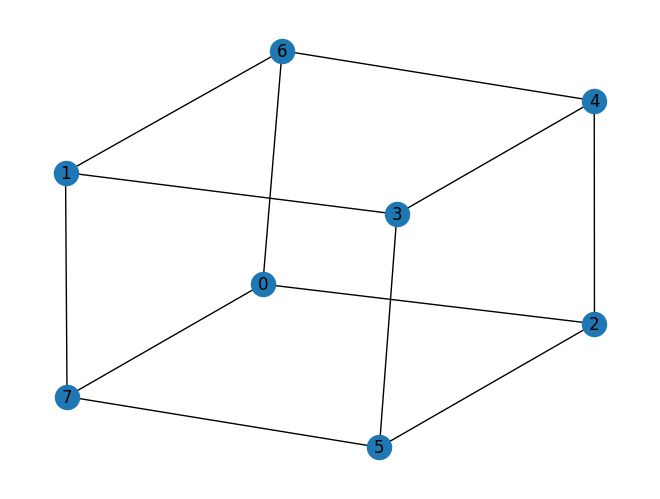

In [12]:
_, _, A_input = decompose_laplacian_matrix(L_input_dense)

nx.draw(nx.from_numpy_array(A_input), with_labels=True)

Injecting an $m$-local perturbation comes at a cost of $4 \cdot 2^m = O(2^m)$ Pauli strings. The method for adding a single perturbation is as follows:

1. Pick some local $m \approx O(1)$.
1. Create the $4$ $m$-local Hamiltonians required to implement the perturbation, combine them into a single perturbation Hamiltonian $H_p$.
1. Scale the perturbation Hamiltonian by $I^{\otimes (n - m)}$ and add it to the large Laplacian Hamiltonian:

$$
    L' = L + I^{\otimes (n - m)} \otimes H_p
    \tag{3}
$$

Let's try:

In [13]:
m1 = 2

Hp1 = op_00 + op_11 - op_01 - op_10
array_to_latex(Hp1.to_matrix())

<IPython.core.display.Latex object>

In [14]:
H12 = SparsePauliOp()

TypeError: SparsePauliOp.__init__() missing 1 required positional argument: 'data'

In [ ]:
L_input_sparse_tag = L_input_sparse + SparsePauliOp("I").tensor(Hp1)
array_to_latex(L_input_sparse_tag)

In [ ]:
L_input_dense_tag = L_input_sparse_tag.to_matrix().real
_, _, A_tag_dense = decompose_laplacian_matrix(L_input_dense_tag)

nx.draw(nx.from_numpy_array(A_tag_dense), with_labels=True)

In [ ]:
np.linalg.eigvalsh(L_input_dense_tag)

In [ ]:
is_valid_laplacian(L_input_dense_tag)

-----------

In [69]:
from qiskit.visualization import array_to_latex
from util import obtain_random_pertubated_laplacian

N_NUM_QUBITS = 13
HILBERT_DIM = 2 ** N_NUM_QUBITS

L1_sparse, L1_sparse_p = obtain_random_pertubated_laplacian(
    n_num_qubits=N_NUM_QUBITS,
    d_skeleton_regularity=11,
    max_skeleton_locality=4,
    num_perturbations=5,
    max_perturbation_dim=4,
    random_pertubations_scaling=True
)

L1_dense, L1_dense_p = L1_sparse.to_matrix().real, L1_sparse_p.to_matrix().real

# display(array_to_latex(L1_dense, max_size=16))
# display(array_to_latex(L1_dense_p, max_size=16))

In [70]:
import numpy as np
import networkx as nx
from util import is_valid_laplacian, decompose_laplacian_matrix

_, _, A1 = decompose_laplacian_matrix(L1_dense)
_, _, A1_p = decompose_laplacian_matrix(L1_dense_p)

g1 = nx.from_numpy_array(A1)
g1_p = nx.from_numpy_array(A1_p)

g1_pos = nx.spring_layout(g1, k=1/np.sqrt(g1.number_of_nodes()), iterations=50, seed=0)  # cached once
g1_p_pos = nx.spring_layout(g1_p, k=1/np.sqrt(g1_p.number_of_nodes()), iterations=50, seed=0)  # cached once

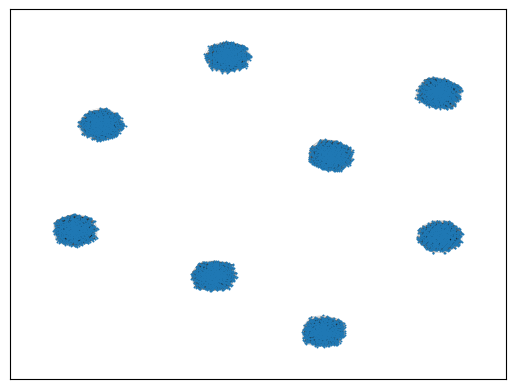

In [71]:
nx.draw_networkx_nodes(g1, pos=g1_pos, node_size=2, linewidths=0)
nx.draw_networkx_edges(g1, pos=g1_pos, width=0.3, alpha=0.15)

plt.show()

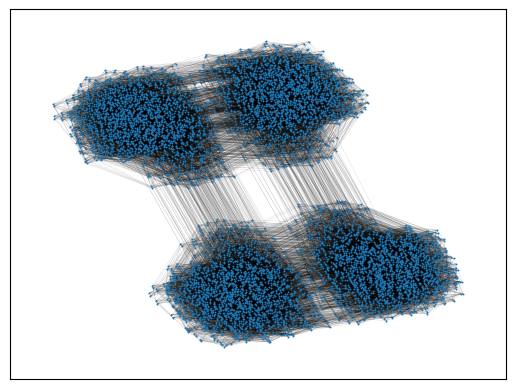

In [72]:
import matplotlib.pyplot as plt

nx.draw_networkx_nodes(g1_p, pos=g1_p_pos, node_size=2, linewidths=0)
nx.draw_networkx_edges(g1_p, pos=g1_p_pos, width=0.3, alpha=0.15)

plt.show()

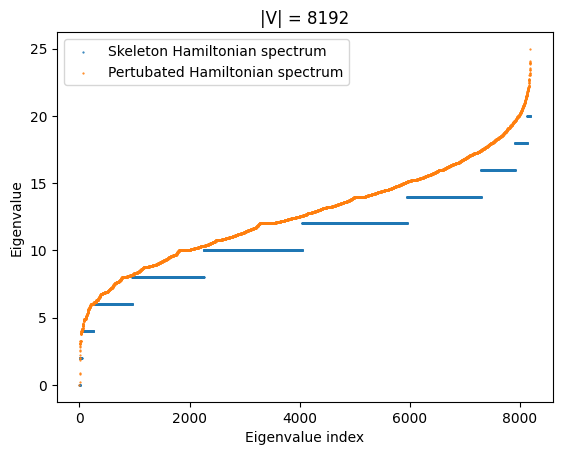

In [73]:
import matplotlib.pyplot as plt

skeleton_spectrum = np.linalg.eigvalsh(L1_dense)
pertubated_spectrum = np.linalg.eigvalsh(L1_dense_p)

plt.scatter(range(HILBERT_DIM), skeleton_spectrum, s=0.3, label="Skeleton Hamiltonian spectrum")
plt.scatter(range(HILBERT_DIM), pertubated_spectrum, s=0.3, label="Pertubated Hamiltonian spectrum")

plt.xlabel("Eigenvalue index")
plt.ylabel("Eigenvalue")

plt.title(f"|V| = {HILBERT_DIM}") #, pertubated algebraic connectivity = {pertubated_spectrum[1]:.5f}")

plt.legend()
plt.show()

In [74]:
len(L1_sparse)

12

In [75]:
Falselen(L1_sparse_p)

188

In [76]:
pertubated_spectrum[1]

0.19493582329240056

In [78]:
is_valid_laplacian(L1_dense_p)

The matrix is a valid (weighted) Laplacian matrix


True

In [82]:
L1_dense_p[0].nonzero()

(array([   0,   40,   48,   97,  100,  256,  320,  768, 1040, 1152, 2085,
        2304, 4120, 4162, 4484]),)